# **UAS KELOMPOK 8**

---



---



Anggota Kelompok:


*   Jonathan David (01112210010)
*   Riechie (01112210038)
*   Vira Jessica (01112210045)





# **Domain Understanding**

---


Pendidikan adalah hal yang sangat penting dalam hidup, kita perlu melatih otak yang kita miliki. Salah satu cara untuk melatih otak tersebut adalah dengan mengikuti kegiatan pembelajaran di sekolah. Melalui proyek ini, kami akan mencari faktor apa saja yang mempengaruhi nilai dalam studi anak-anak pada jenjang SMA di portugal. Dengan demikian, kami menggunakan model Random Forest Regressor dan Linear Regressor. Melalui Project ini juga, kami bisa menemukan apa saja yang perlu ditingkatkan supaya nilai juga bisa meningkat. Pendidikan di Portugal juga dapat dikatakan berada di bawah dalam kawasan eropa dan kami ingin mencari faktor-faktornya dan membuat model untuk memprediksi.

[Jurnal 1](http://www3.dsi.uminho.pt/pcortez/student.pdf)

# **Data Understanding**

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Penjelasan Singkat Data**

Data diambil dari https://www.kaggle.com/datasets/whenamancodes/student-performance

<br>Data berisi nilai anak-anak dari dua sekolah menengah atas di Portugal pada mata pelajaran matematika, dalam data juga terdapat berbagai fitur yang berhubungan dengan pencapaian akademis anak, seperti waktu belajar, aktivitas ekstrakrikuler, hubungan dengan keluarga, dan lain-lain. Atribut target nya ialah kolom 'G3', yaitu nilai akhir tahun anak-anak.

<br>Data ini didapatkan dari nilai raport anak-anak sekolah, dan dari kuesioner yang disebarkan oleh pemilik data.

**Membaca Dan Menginspeksi Data**

In [ ]:
data = pd.read_csv('/Maths.csv', sep = ';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Dilakukan pengecekan data terlebih dahulu untuk memastikan bahwa data yang diambil tidak bermasalah, dan terlihat bahwa data dalam kondisi dapat digunakan. Namun tidak semua nama atribut dapat terlihat, oleh karena itu kami akan mengecek semua nama kolom dalam data.

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Deskripsi Kolom

**school** - student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<br>**sex** - student's sex ('F' - female or 'M' - male)
<br>**age** - student's age (from 15 to 22)
<br>**address** - 	student's home address type ('U' - urban or 'R' - rural)
<br>**famsize** - family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)
<br>**Pstatus** - parent's cohabitation status ('T' - living together or 'A' - apart)
<br>**Medu** - mother's education (0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 -secondary education or 4 - higher education)
<br>**Fedu** - father's education (0 - none, 1 - primary education (4th grade), 2 (5th to 9th grade), 3 - secondary education, or 4 - higher education)
<br>**Mjob** - 	mother's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>**Fjob** - father's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>**reason** - reason to choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
<br>**guardian** - student's guardian ('mother', 'father' or 'other')
<br>**traveltime** - home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<br>**studytime** - weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<br>**failures** - number of past class failures (n if 1<=n<3, else 4)
<br>**schoolsup** - extra educational support (yes or no)
<br>**famsup** - family educational support (yes or no)
<br>**paid** - extra paid classes within the course subject (yes or no)
<br>**activities** - extra-curricular activities (yes or no)
<br>**nursery** - attended nursery school (yes or no)
<br>**higher** - wants to take higher education (yes or no)
<br>**internet** - Internet access at home (yes or no)
<br>**romantic** - with a romantic relationship (yes or no)
<br>**famrel** - quality of family relationships (from 1 - very bad to 5 - excellent)
<br>**freetime** - free time after school (from 1 - very low to 5 - very high)
<br>**goout** - going out with friends (from 1 - very low to 5 - very high)
<br>**Dalc** - workday alcohol consumption (from 1 - very low to 5 - very high)
<br>**Walc** - weekend alcohol consumption (from 1 - very low to 5 - very high)
<br>**health** - current health status (from 1 - very bad to 5 - very good)
<br>**absences** - number of school absences (from 0 to 93)
<br>**G1** - first period grade (from 0 to 20)
<br>**G2** - second period grade (from 0 to 20)
<br>**G3** - final grade (from 0 to 20, output target)

Sekarang sudah terlihat jelas semua nama attribut yang terdapat dalam data, kolom utama yang akan menjadi target output kami adalah 'G3'. Berikutnya kami akan mengecek ukuran data.

**Ukuran Data**

In [ ]:
len(data)

397

In [ ]:
data.shape

(397, 33)

Data terdiri dari 397 baris dan 33 kolom, berarti terdapat 397 siswa. Berikutnya kami akan melakukan beberapa pengecekan terhadap data, yaitu deskripsi data dan tipe data.

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.944584,3.234257,3.108312,1.478589,2.289673,3.556675,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.894400,0.996476,1.112762,0.889143,1.286770,1.388967,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**Tipe Data**

In [ ]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Terlihat semua kolom data serta tipe data nya, tipe data yang kami miliki terdiri dari data numerik dan data kategorik. Akan kami lakukan proses yang sesuai untuk masing-masing tipe data. Hal menarik yang dapat dilihat disini adalah bahwa kolom output kami, yaitu 'G3', memiliki tipe data numerik, sehingga kami akan menggunakan model regresi untuk melakukan prediksi nanti.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      397 non-null    object
 1   sex         397 non-null    object
 2   age         397 non-null    int64 
 3   address     397 non-null    object
 4   famsize     397 non-null    object
 5   Pstatus     397 non-null    object
 6   Medu        397 non-null    int64 
 7   Fedu        397 non-null    int64 
 8   Mjob        397 non-null    object
 9   Fjob        397 non-null    object
 10  reason      397 non-null    object
 11  guardian    397 non-null    object
 12  traveltime  397 non-null    int64 
 13  studytime   397 non-null    int64 
 14  failures    397 non-null    int64 
 15  schoolsup   397 non-null    object
 16  famsup      397 non-null    object
 17  paid        397 non-null    object
 18  activities  397 non-null    object
 19  nursery     397 non-null    object
 20  higher    

# **Data Cleansing**

Pada bagian ini kami akan melakukan pengecekan terhadap  outlier dan missing values, lalu melakukan teknik imputasi yang sesuai.

**Mengecek dan Membuang Outlier**

Pengecekan dan penghapusan outlier dari data diharapkan dapat membantu model machine learning yang kami gunakan nanti menjadi lebih baik. Patut diperhatikan bahwa outlier hanya perlu dicek untuk data numerik non ordinal saja, yaitu data diskrit dan kontinu. Tidak terdapat 'outlier' di data kategorikal dan ordinal dalam pengertian yang sama seperti di data numerik.
<br>
<br>
Dalam data yang kami miliki, hanya terdapat dua fitur/atribut/kolom yang memiliki tipe numerik non ordinal, yaitu 'age', 'absences', dan 'G3'. Kolom 'G1' dan 'G2' tidak perlu dicek, karena tidak akan kami gunakan dalam pengembangan model.

In [ ]:
# Mencari q1, q3, dan IQR untuk mencari batas atas dan batas bawah outlier(s) dari suatu column. Lalu, indexnya
# dikumpulkan dan akan di drop (row-nya dihapus) pada akhir.
index_del = []
age = []
for i in range(len(data)):
    age.append(data.loc[i, 'age'])
age.sort()
length = len(age)

q1 = int(1/4 * (length + 1))
q1 = age[q1]
q3 = int(3/4 * (length + 1))
q3 = age[q3]
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

for j in range(len(data)):
    if data.loc[j, 'age'] > upper_bound:
        index_del.append(j)
    elif data.loc[j, 'age'] < lower_bound:
        index_del.append(j)
len(index_del)

1

In [ ]:
absences = []
for i in range(len(data)):
    absences.append(data.loc[i, 'absences'])
absences.sort()
length = len(absences)
q1 = int(1/4 * (length + 1))
q1 = absences[q1]
q3 = int(3/4 * (length + 1))
q3 = absences[q3]
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

for j in range(len(data)):
    if data.loc[j, 'absences'] > upper_bound:
        index_del.append(j)
    elif data.loc[j, 'absences'] < lower_bound:
        index_del.append(j)
len(index_del)

16

In [ ]:
G3 = []
for i in range(len(data)):
    G3.append(data.loc[i, 'G3'])
G3.sort()
length = len(G3)
q1 = int(1/4 * (length + 1))
q1 = G3[q1]
q3 = int(3/4 * (length + 1))
q3 = G3[q3]
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

for j in range(len(data)):
    if data.loc[j, 'G3'] > upper_bound:
        index_del.append(j)
    elif data.loc[j, 'G3'] < lower_bound:
        index_del.append(j)
len(index_del)

16

In [ ]:
index_del = list(set(index_del))
len(index_del)

data = data.drop(index_del)
data.to_csv("Maths (Outlier).csv", index = False)

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data = pd.read_csv("Maths (Outlier).csv", sep = ',')
len(data)

381

In [ ]:
data.shape

(381, 33)

Dapat terlihat bahwa jumlah baris data sekarang telah berkurang dikarenakan outlier telah dihapus.

**Mengecek Data hilang**

In [ ]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Dapat terlihat bahwa tidak terdapat missing values pada data yang kami miliki, oleh karena itu, kami akan mencoba untuk menghapus beberapa nilai dan menggunakan teknik imputasi yang telah diajarkan.

**Menghapus Data Secara Random**

In [ ]:
import csv
import random

Teknik yang akan kami gunakan ialah: missing value completely at random (MCAR)

In [ ]:
data_edit = data.copy()
column_name = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
               'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
               'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
for i in range(len(data_edit)):
    rand1 = random.randint(1,3)
    if rand1 == 1:
        rand2 = random.randint(0,32)
        data_edit.loc[i, column_name[rand2]] = None

In [ ]:
data_edit.isnull().any()

school         True
sex            True
age            True
address        True
famsize        True
Pstatus        True
Medu           True
Fedu           True
Mjob           True
Fjob           True
reason         True
guardian       True
traveltime     True
studytime      True
failures       True
schoolsup      True
famsup         True
paid           True
activities     True
nursery        True
higher         True
internet       True
romantic      False
famrel         True
freetime       True
goout          True
Dalc           True
Walc           True
health         True
absences       True
G1             True
G2             True
G3             True
dtype: bool

In [ ]:
data_edit.isnull().sum()

school        3
sex           4
age           1
address       3
famsize       3
Pstatus       5
Medu          6
Fedu          7
Mjob          3
Fjob          5
reason        5
guardian      5
traveltime    4
studytime     5
failures      5
schoolsup     3
famsup        5
paid          4
activities    6
nursery       3
higher        3
internet      4
romantic      0
famrel        5
freetime      3
goout         4
Dalc          4
Walc          3
health        3
absences      4
G1            5
G2            6
G3            2
dtype: int64

Sekarang sudah terdapat missing values dalam data, yang kami simpan dalam 'data_edit', berikutnya kami akan menggunakan teknik imputasi data untuk mengisi data hilang tersebut.

**Imputasi Data**

In [ ]:
# Imputasi mean untuk column age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health,
# absences, G1, G2, and G3

imputasi_mean = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc',
                   'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

for i in range(len(imputasi_mean)):
    col = imputasi_mean[i]
    mean_col = int(data_edit[col].mean())

    for j in range(len(data_edit)):
        if pd.isna(data_edit.loc[j, col]) == True:
            data_edit.loc[j, col] = mean_col

In [ ]:
# Imputasi arbitrary untuk column school (GP or MS), sex (F or M), address (U or R), famsize (LE3 or GT3), Pstatus (A or T) - modus,
# guardian (mother, father, or other) - modus, schoolsup - modus, famsup - modus, paid - modus, activities - modus, nursery - modus, higher - modus,
# internet - modus, and romantic (yes or no) - modus
# using random module

imputasi_school = ['GP', 'MS']
for i in range(len(data_edit)):
    if pd.isna(data_edit.loc[i, 'school']) == True:
        rand = random.randint(0, 1)
        data_edit.loc[i, 'school'] = imputasi_school[rand]

imputasi_sex = ['F', 'M']
for i in range(len(data_edit)):
    if pd.isna(data_edit.loc[i, 'sex']) == True:
        rand = random.randint(0, 1)
        data_edit.loc[i, 'sex'] = imputasi_sex[rand]

# Porbability untuk yes/no bagi variabel dibawah ini hampir 50% (sama)
column_imputasimix = ['famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
imputasi_mix = ['yes', 'no']
for i in range(len(column_imputasimix)):
    for j in range(len(data_edit)):
        data_edit.loc[j, column_imputasimix[i]] = imputasi_mix[random.randint(0, 1)]

In [ ]:
# Mencari modus (mode) untuk setiap column
print(data_edit.mode())

  school sex   age address famsize Pstatus  Medu  Fedu   Mjob   Fjob  ...  \
0     GP   F  16.0       U     GT3       T   4.0   2.0  other  other  ...   

  famrel freetime  goout  Dalc  Walc health absences    G1    G2    G3  
0    4.0      3.0    3.0   1.0   1.0    5.0      0.0  10.0  10.0  10.0  

[1 rows x 33 columns]


In [ ]:
# Imputasi mode untuk column Mjob, Fjob (teacher, health, services, or at_home), reason (home, reputation, course, or other), dll.

mode_MFjob = 'other'
mode_reason = 'course'
mode_address = 'U'
mode_famsize = 'GT3'
mode_Pstatus = 'T'
mode_guardian = 'mother'
mode_schoolsup = 'no'

for i in range(len(data_edit)):
    if pd.isna(data_edit.loc[i, 'Mjob']) == True:
        data_edit.loc[i, 'Mjob'] = 'other'
    if pd.isna(data_edit.loc[i, 'Fjob']) == True:
        data_edit.loc[i, 'Fjob'] = 'other'
    if pd.isna(data_edit.loc[i, 'reason']) == True:
        data_edit.loc[i, 'reason'] = 'course'
    if pd.isna(data_edit.loc[i, 'address']) == True:
        data_edit.loc[i, 'address'] = 'U'
    if pd.isna(data_edit.loc[i, 'famsize']) == True:
        data_edit.loc[i, 'famsize'] = 'GT3'
    if pd.isna(data_edit.loc[i, 'Pstatus']) == True:
        data_edit.loc[i, 'Pstatus'] = 'T'
    if pd.isna(data_edit.loc[i, 'guardian']) == True:
        data_edit.loc[i, 'guardian'] = 'mother'
    if pd.isna(data_edit.loc[i, 'schoolsup']) == True:
        data_edit.loc[i, 'schoolsup'] = 'no'

In [ ]:
data_edit.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

Semua missing value telah terisi, berikutnya kami akan melakukan proses pemilihan fitur terbaik untuk mengembangkan model.

# **Feature Processing**

Dalam bagian ini kami akan melakukan proses seleksi fitur yang akan digunakan dalam model kami nanti, guna mendapatkan hasil prediksi terbaik.

**Visualisasi Korelasi Data numerik Terhadap Nilai Akhir**

In [ ]:
num_features = [features for features in data_edit.columns if data[features].dtypes != 'O' ]
num_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Semua atribut numerik dalam data telah ditampung dalam 'num_features', namun patut diperhatikan bahwa dalam data numerik ini banyak yang sebenarnya berjenis ordinal, yaitu tipe data dimana angkanya memiliki urutan. Hanya atribut 'age' dan 'absences' yang bukan merupakan data ordinal.

In [ ]:
contdisc_features = [e for e in num_features if e in ('age', 'absences')]
ord_features = [e for e in num_features if e not in ('G1', 'G2','age','absences')]
contdisc_features

['age', 'absences']

In [ ]:
ord_features

['Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'G3']

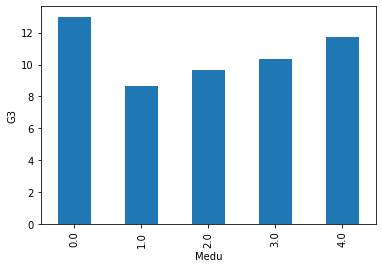

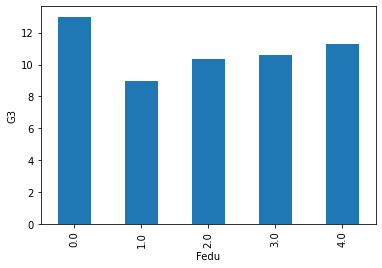

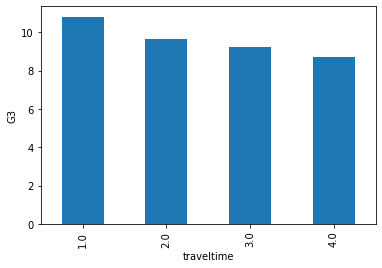

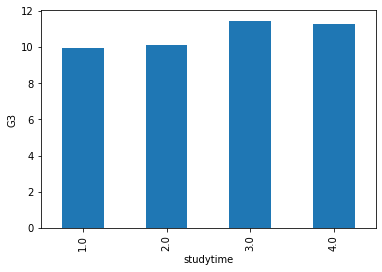

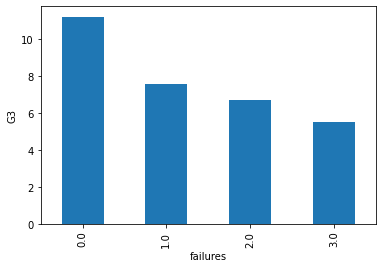

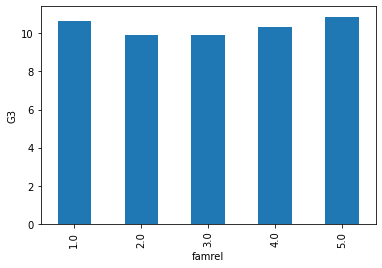

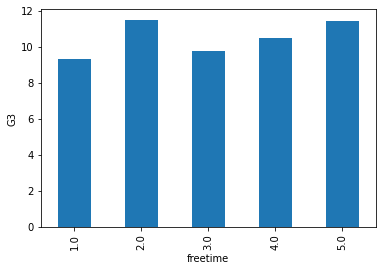

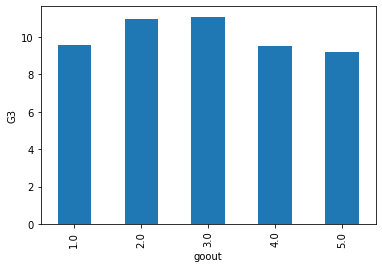

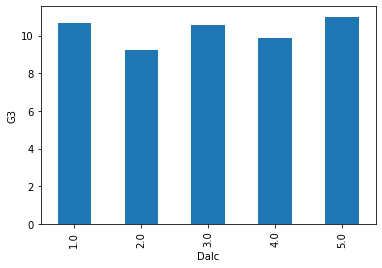

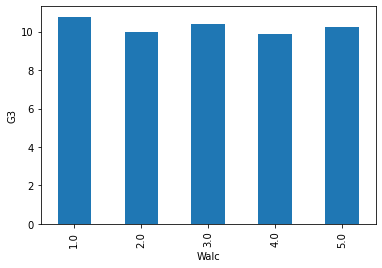

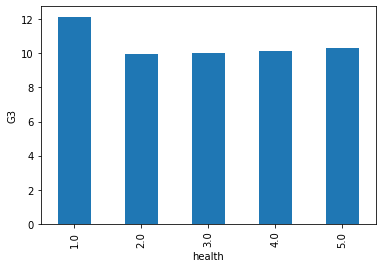

In [ ]:
for features in ord_features[:11]:
    data_edit.groupby(features).mean()['G3'].plot.bar(ylabel='G3')
    plt.show()

Code diatas bertujuan agar kami dapat melihat visualisasi korelasi dari atribut-atribut bertipe data ordinal terhadap nilai akhir tahun anak-anak sekolah. Berikutnya kami akan memvisualisasikan distribusi dari 'G3' dan melihat bagaimana distribusi tersebut berbeda di antara atribut-atribut ordinal.

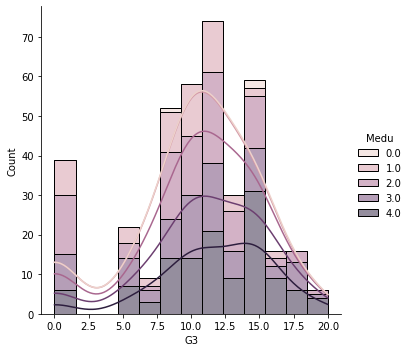

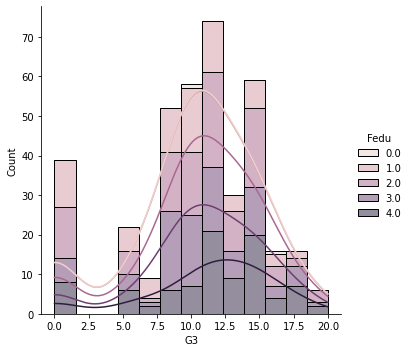

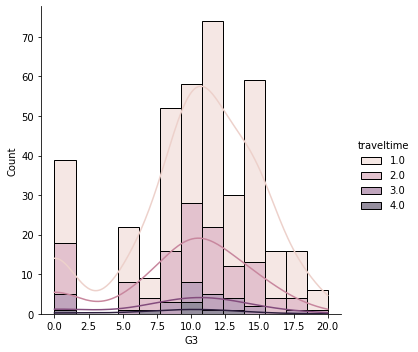

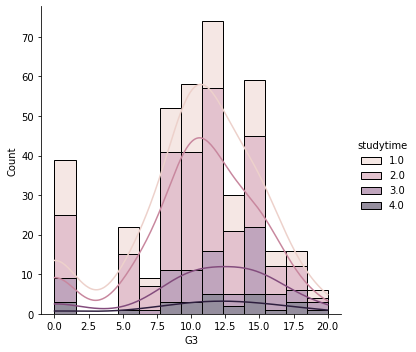

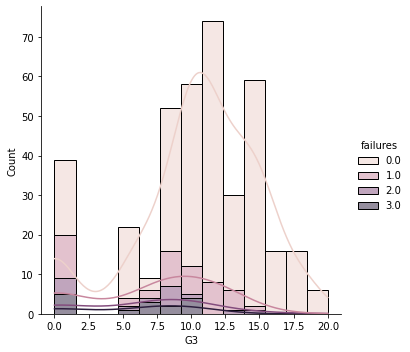

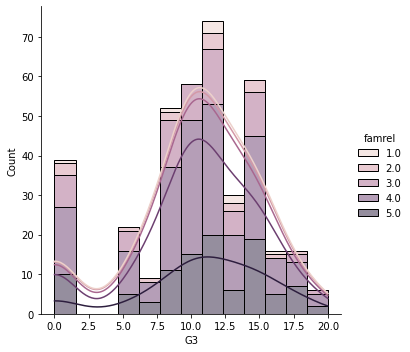

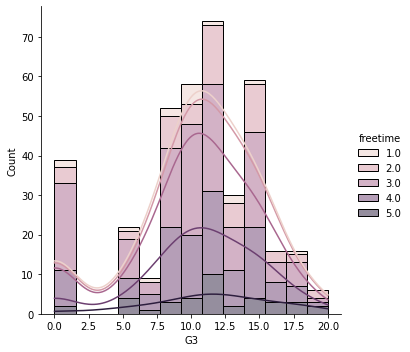

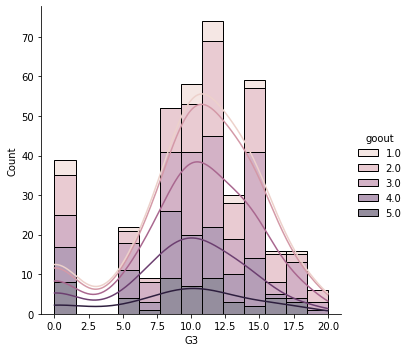

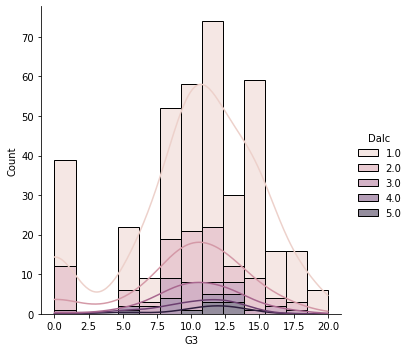

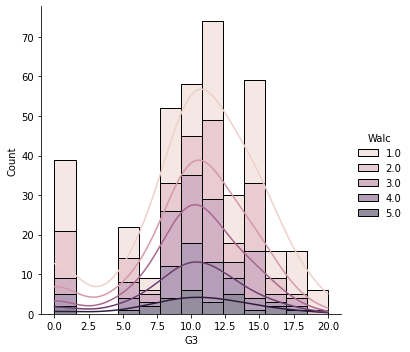

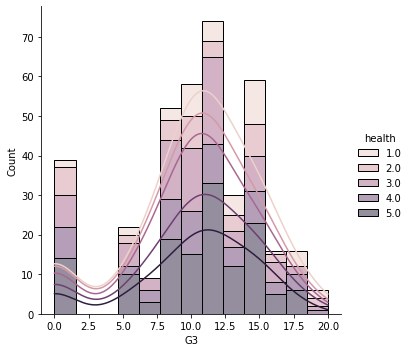

In [ ]:
for features in ord_features[:11]:
  sns.displot(data_edit, x="G3", hue=features, multiple="stack", kde = True)

Setelah ini kami akan memvisualisasikan distribusi dari atribut numerik yang kami miliki dengan menggunakan histogram.

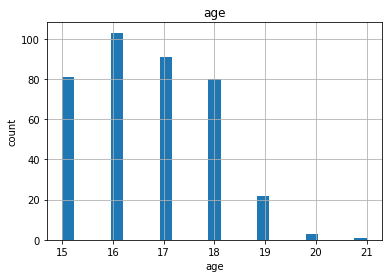

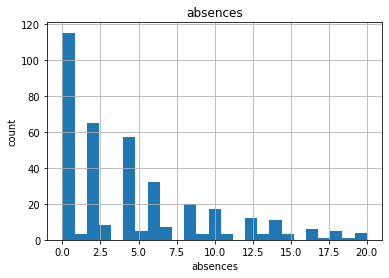

In [ ]:
for features in contdisc_features:
    data_edit[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

**Visualisasi Korelasi Data Kategorikal Terhadap Nilai Akhir**

In [ ]:
Obj_features = [features for features in data_edit.columns if data_edit[features].dtypes == 'O' ]
Obj_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Semua atribut numerik dalam data telah ditampung dalam 'num_features', berikutnya kami akan memvisualisasi korelasi dari atribut-atribut bertipe kategorikal ini dengan 'G3'.

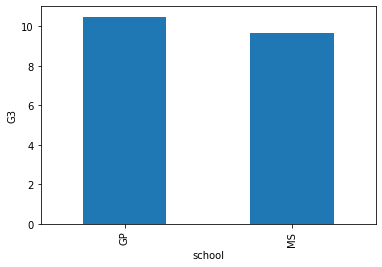

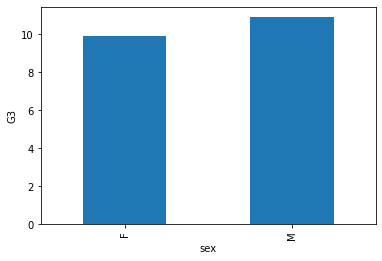

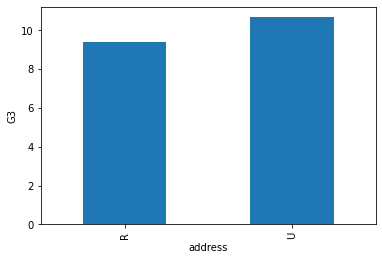

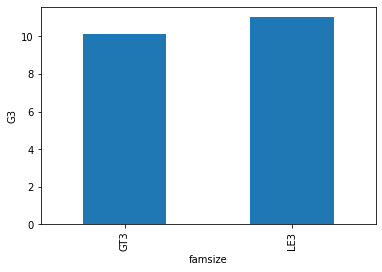

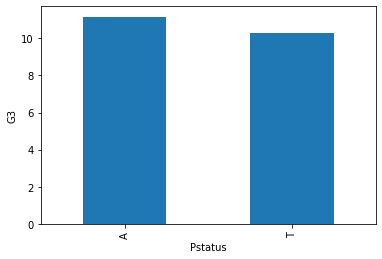

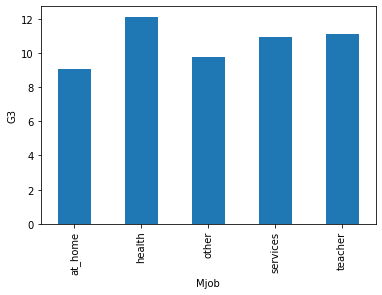

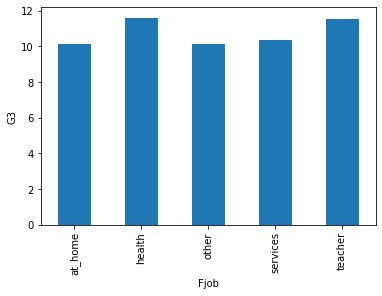

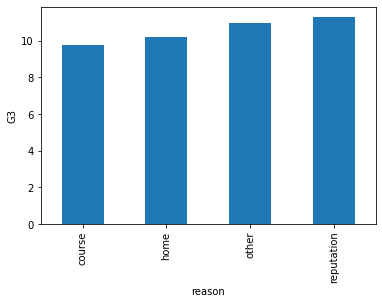

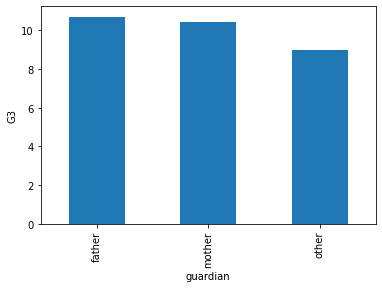

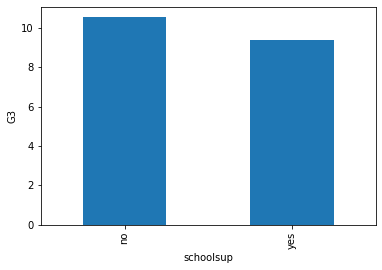

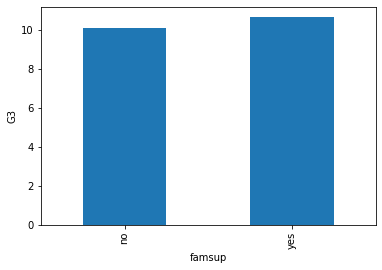

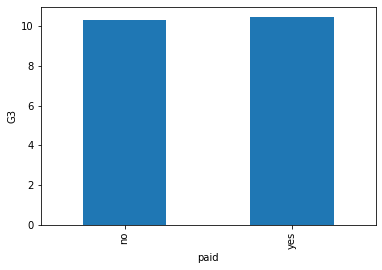

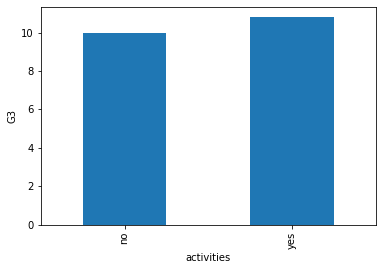

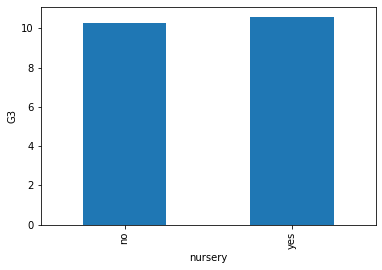

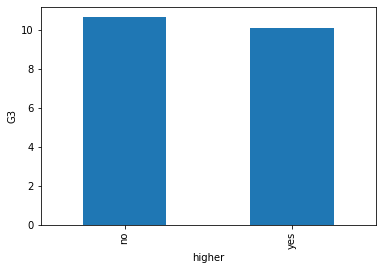

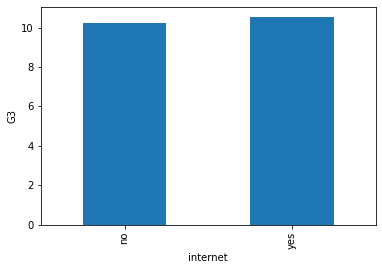

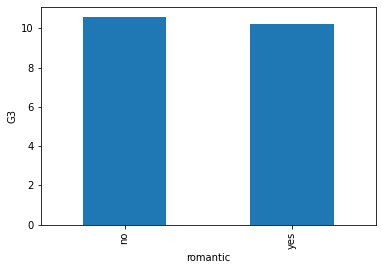

In [ ]:
for features in Obj_features:
    data_edit.groupby(features).mean()['G3'].plot.bar(ylabel='G3')
    plt.show()

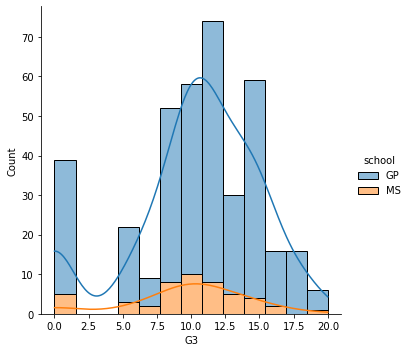

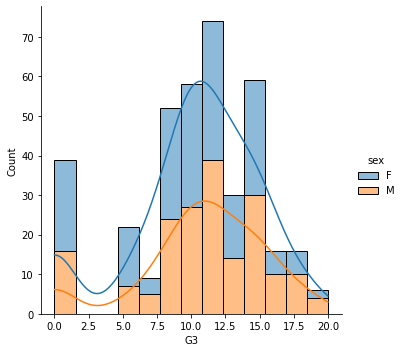

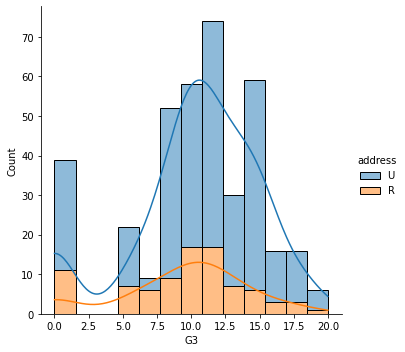

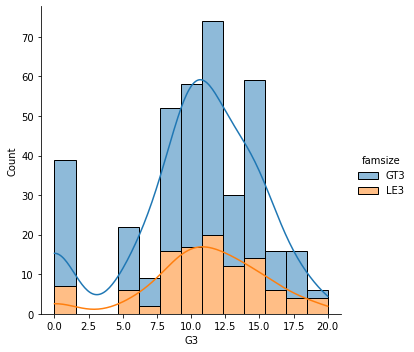

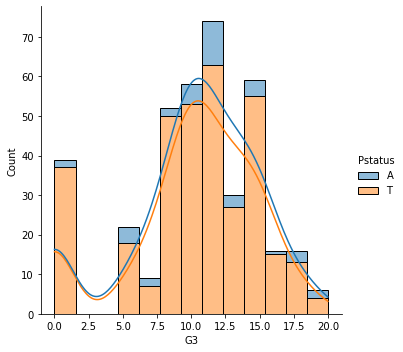

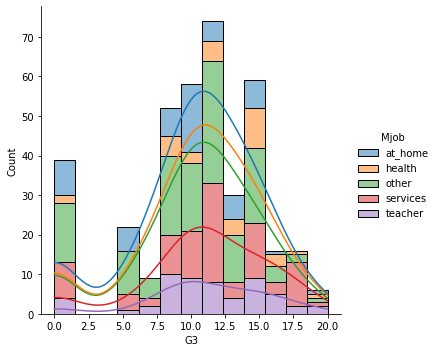

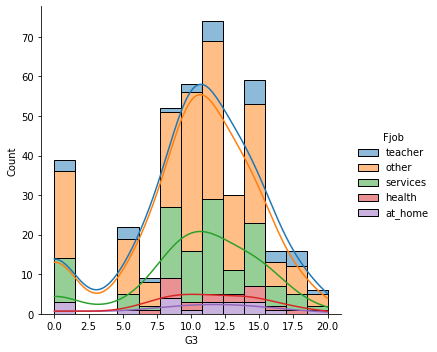

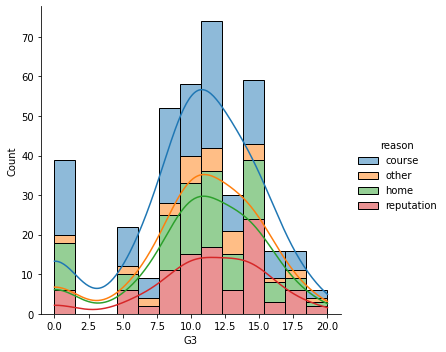

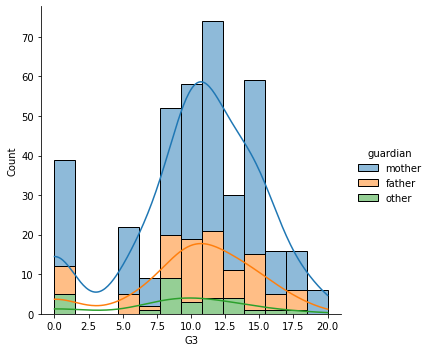

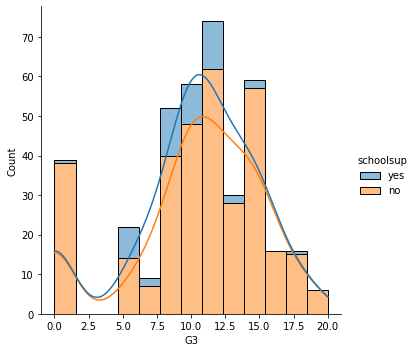

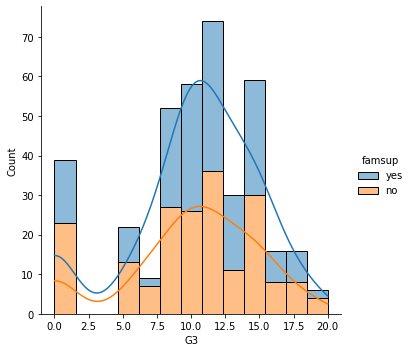

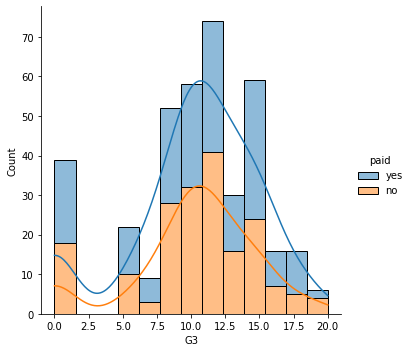

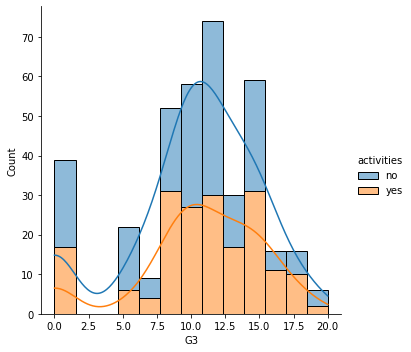

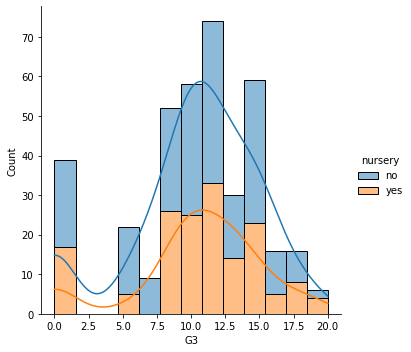

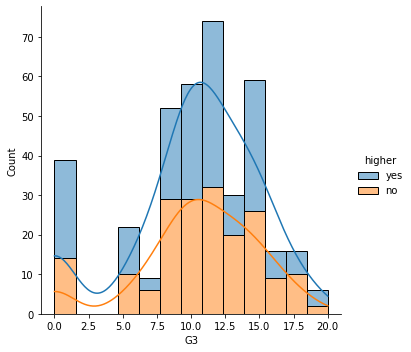

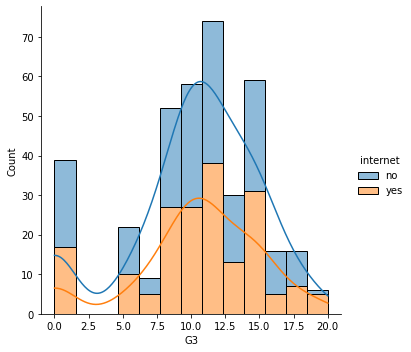

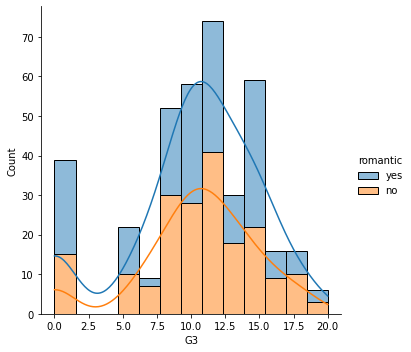

In [ ]:
for features in Obj_features:
  sns.displot(data_edit, x="G3", hue=features, multiple = "stack", kde = True)

**Mencari Korelasi**

Disini kami akan melakukan seleksi fitur dengan menggunakan korelasi Pearson.

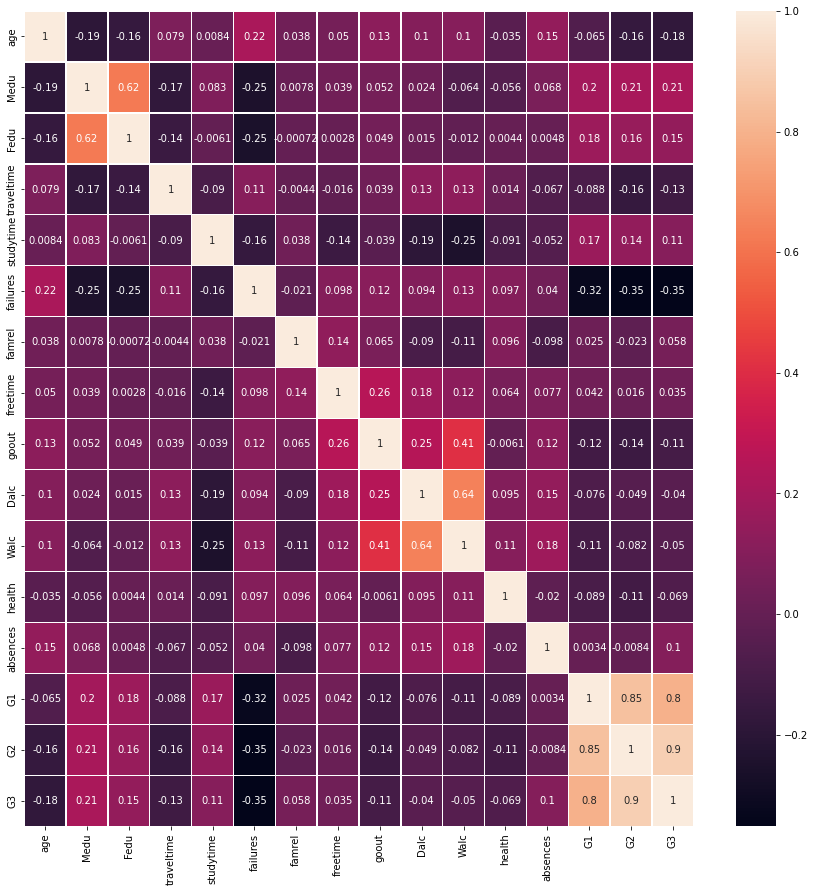

In [ ]:
correlation = data_edit.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

In [ ]:
data_edit.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.898452
G1            0.798054
Medu          0.214382
Fedu          0.149488
studytime     0.106812
absences      0.101530
famrel        0.058488
freetime      0.035194
Dalc         -0.040456
Walc         -0.050206
health       -0.068542
goout        -0.108061
traveltime   -0.130197
age          -0.175787
failures     -0.351140
Name: G3, dtype: float64

Diatas merupakan korelasi dari masing-masing fitur terhadap 'G3', namun dapat terlihat bahwa fitur-fitur diatas hanya mencakup fitur bertipe data numerik saja, oleh karena itu perlu dilakukan transformasi terlebih dahulu terhadap fitur-fitur bertipe data kategorikal.

**Transformasi Data Kategorik Menjadi Numerik**

Kami menggunakan 'LabelEncoder' untuk mentransformasi data kategorikal menjadi numerik, kami merasa apabila menggunakan 'OneHotEncoder', kolom yang dihasilkan akan menjadi terlalu banyak.

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
for features in Obj_features:
    data_edit[features] = Label_encoder.fit_transform(data_edit[features])

In [ ]:
data_edit.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18.0,1,0,0,4.0,4.0,0,4,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,0,0,17.0,1,0,1,1.0,1.0,0,2,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,0,0,15.0,1,1,1,1.0,1.0,0,2,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,0,0,15.0,1,0,1,4.0,2.0,1,3,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,0,0,16.0,1,0,1,3.0,3.0,2,2,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0


In [ ]:
data_edit.dtypes

school          int64
sex             int64
age           float64
address         int64
famsize         int64
Pstatus         int64
Medu          float64
Fedu          float64
Mjob            int64
Fjob            int64
reason          int64
guardian        int64
traveltime    float64
studytime     float64
failures      float64
schoolsup       int64
famsup          int64
paid            int64
activities      int64
nursery         int64
higher          int64
internet        int64
romantic        int64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
G3            float64
dtype: object

Terlihat bahwa semua fitur sudah bertipe data numerik.

**Melakukan Scaling Pada Data**

Berikutnya kami melakukan scaling pada data menjadi range 0:1 dengan menggunakan 'MinMaxScaler'. Scaling ini kami lakukan dengan harapan bahwa model akan bekerja lebih baik apabila semua fitur berada pada skala yang sama.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = [features for features in data_edit.columns if features not in ('G3')]
scaler = MinMaxScaler()
data_edit[features] = scaler.fit_transform(data_edit[features])
data_edit.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.500000,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.5,0.3,0.1250,0.315789,6.0
1,0.0,0.0,0.333333,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.5,0.2,0.1250,0.263158,6.0
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.5,0.5,0.2500,0.421053,10.0
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.0,0.1,0.7500,0.736842,15.0
4,0.0,0.0,0.166667,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.0,0.2,0.1875,0.526316,10.0


Dapat terlihat bahwa semua data sudah berada dalam range 0 sampai 1, berikutnya kami akan menampilkan korelasi absolut dari masing-masing fitur terhadap 'G3'.

**Seleksi Fitur**

In [ ]:
data_edit.corr().abs()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.898452
G1            0.798054
failures      0.351140
Medu          0.214382
age           0.175787
Fedu          0.149488
reason        0.135999
traveltime    0.130197
address       0.116358
sex           0.109178
goout         0.108061
studytime     0.106812
Mjob          0.106590
absences      0.101530
famsize       0.087972
activities    0.085348
schoolsup     0.082362
guardian      0.073716
health        0.068542
famsup        0.060643
higher        0.059945
famrel        0.058488
school        0.056866
Pstatus       0.056432
Walc          0.050206
Dalc          0.040456
romantic      0.038062
freetime      0.035194
Fjob          0.035030
nursery       0.032303
internet      0.027911
paid          0.013102
Name: G3, dtype: float64

Dari fitur-fitur diatas, kami akan menyeleksi 10 fitur teratas saja yang memiliki korelasi tertinggi dengan 'G3'. Tentu saja kolom 'G3' sendiri tidak akan masuk karena merupakan kolom output, kolom 'G1' dan 'G2' juga tidak akan diseleksi karena kedua kolom tersebut juga merupakan nilai periode awal dan akhir dari anak-anak sekolah, sehingga meskipun prediksi akan sangat akurat apabila menggunakan dua fitur tersebut, namun tidak akan terlalu bermanfaat.

In [ ]:
correlated = data_edit.corr().abs()['G3'].sort_values(ascending=False) [0:13]
correlated = correlated.drop(['G3','G2','G1'])
correlated

failures      0.351140
Medu          0.214382
age           0.175787
Fedu          0.149488
reason        0.135999
traveltime    0.130197
address       0.116358
sex           0.109178
goout         0.108061
studytime     0.106812
Name: G3, dtype: float64

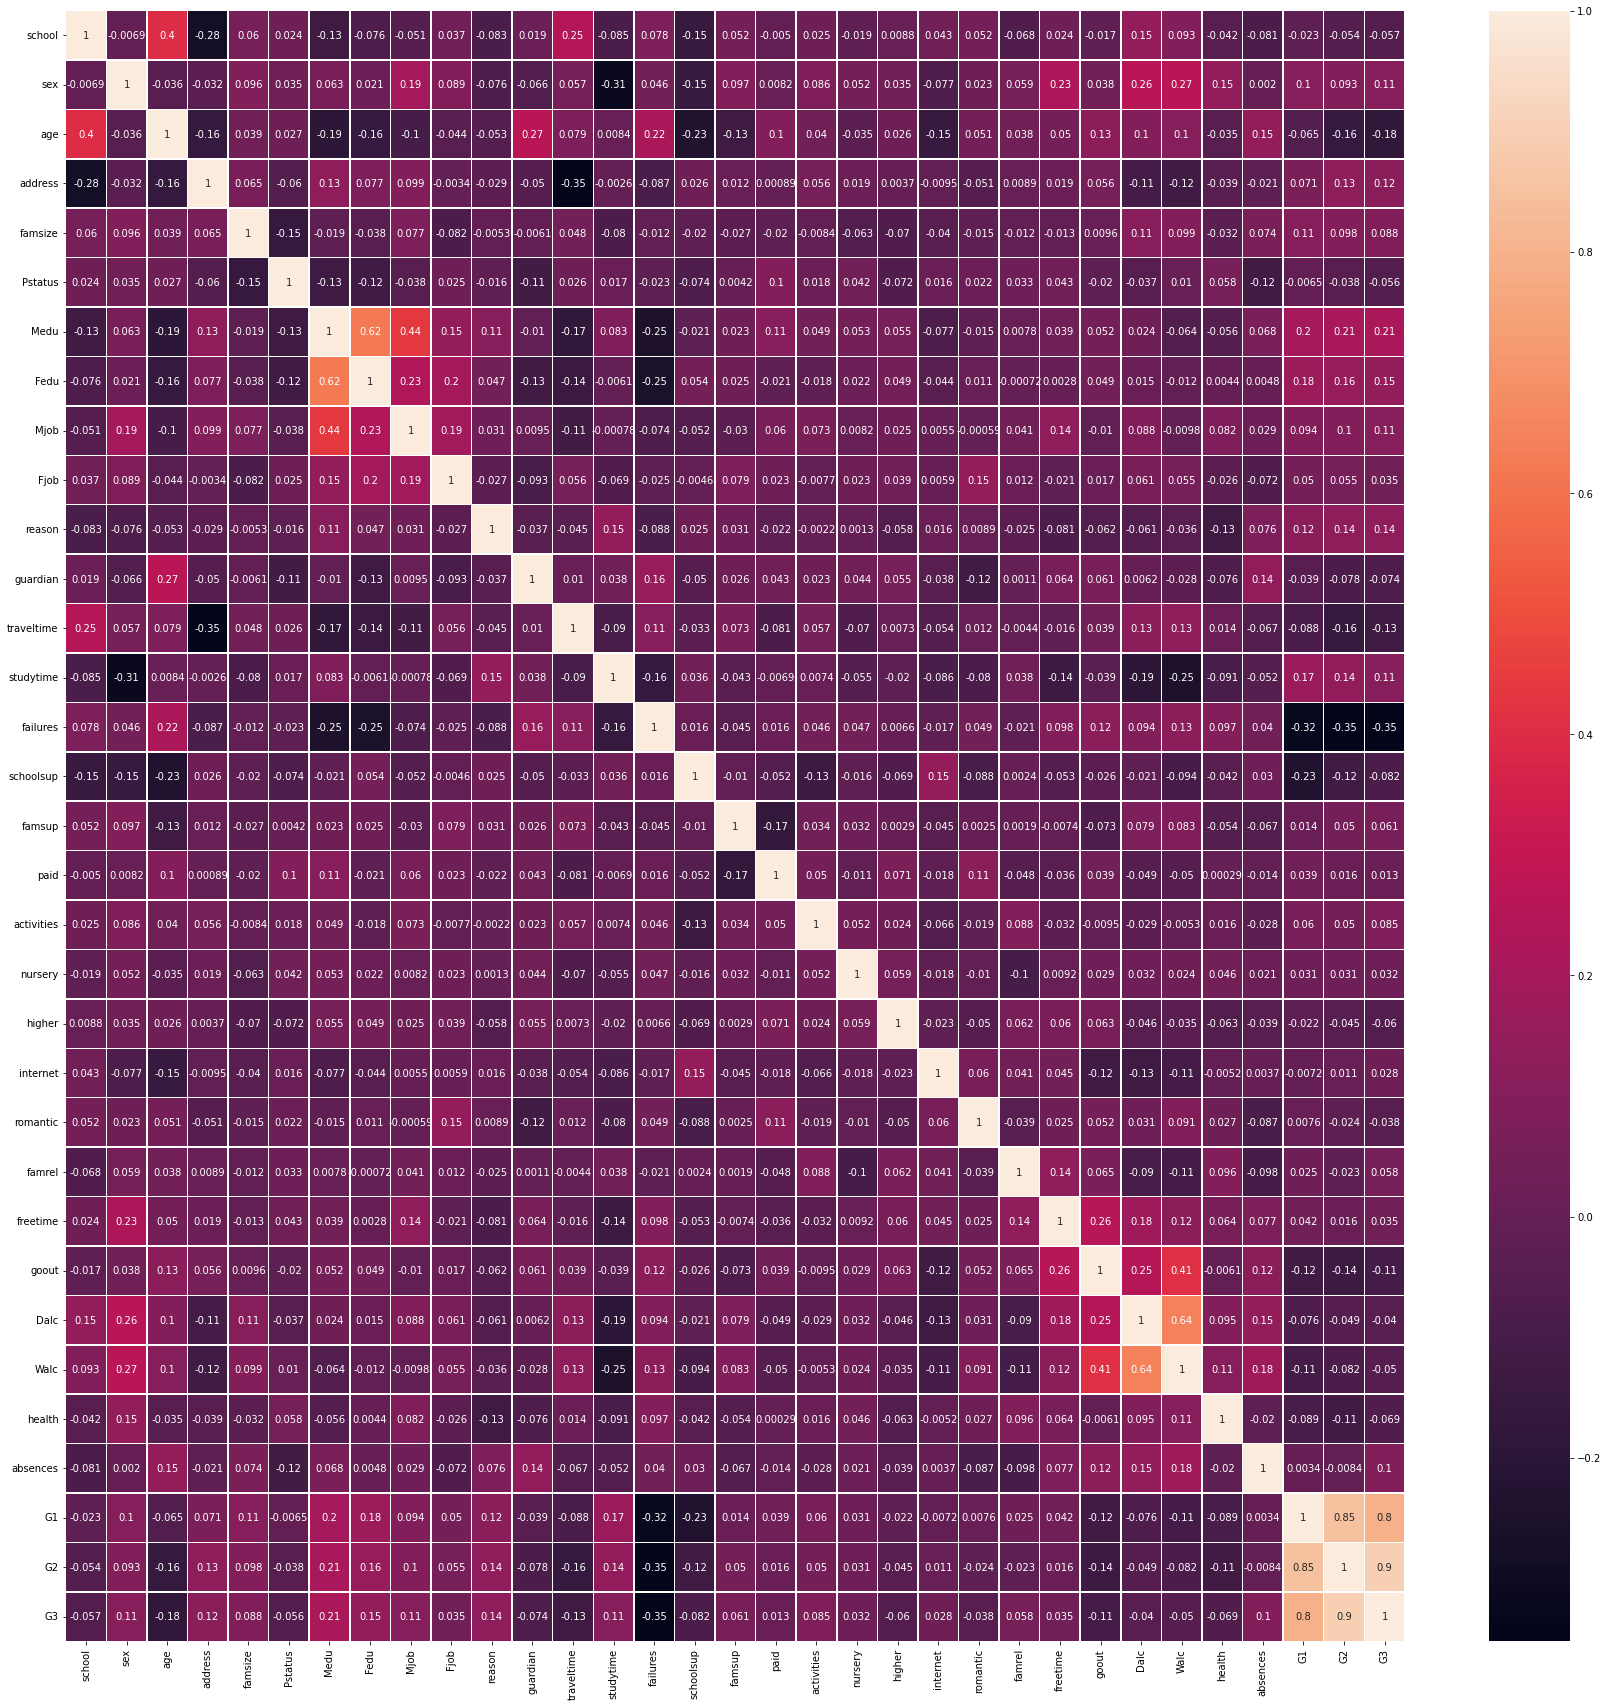

In [ ]:
correlation = data_edit.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

# **Pengembangan Model**

Sekarang kami sampai pada tahap pengembangan model, model yang akan kami gunakan adalah Random Forest Regressor dan Linear Regression.

[Jurnal 2](http://www.stmik-budidarma.ac.id/ejurnal/index.php/mib/article/view/3492)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


**Mendefinisikan dan Membagi Variabel Input dan Output**

Pertama-tama, akan didefinisikan terlebih dahulu variabel input X, yaitu fitur-fitur yang telah kami seleksi pada bagian sebelumnya. Kemudian didefinisikan variabel y, yaitu 'G3' atau nilai akhir tahun anak-anak sekolah.

In [ ]:
X = data_edit.loc[:, correlated.index]
y = data_edit['G3']

In [ ]:
X

,failures,Medu,age,Fedu,reason,traveltime,address,sex,goout,studytime
0,0.000000,1.00,0.500000,1.00,0.000000,0.333333,1.0,0.0,0.75,0.333333
1,0.000000,0.25,0.333333,0.25,0.000000,0.000000,1.0,0.0,0.50,0.333333
2,1.000000,0.25,0.000000,0.25,0.666667,0.000000,1.0,0.0,0.25,0.333333
3,0.000000,1.00,0.000000,0.50,0.333333,0.000000,1.0,0.0,0.25,0.666667
4,0.000000,0.75,0.166667,0.75,0.333333,0.000000,1.0,0.0,0.25,0.333333
...,...,...,...,...,...,...,...,...,...,...
376,1.000000,0.25,1.000000,0.25,0.000000,0.000000,0.0,1.0,0.50,0.000000
377,0.000000,0.75,0.500000,0.50,0.000000,0.666667,0.0,1.0,0.00,0.000000
378,0.000000,0.25,0.666667,0.25,0.000000,0.000000,1.0,1.0,0.50,0.000000
379,0.000000,1.00,0.500000,1.00,0.000000,0.333333,1.0,0.0,0.75,0.333333


Setelah berhasil didefinisikan, maka data tersebut akan dibagi menjadi data training dan data testing.

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

Data sudah berhasil dibagi, tahap berikutnya adalah mengembangkan model. Untuk mengevaluasi model yang telah dibuat, kami menggunakan Mean Absolute Error, Root Mean Squared Error, dan R Squared.

**Random Forrest Regressor**

In [ ]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_predict = rf_model.predict(test_X)

rf_test_mae = mean_absolute_error(rf_predict, test_y)
print("Validation MAE for Random Forest Model: {}".format(rf_test_mae))

rf_test_rmse = np.sqrt(mean_squared_error(rf_predict, test_y))
print("Validation RMSE for Random Forest Model: {}".format(rf_test_rmse))

rf_test_r2 = r2_score(test_y, rf_predict)
print("Validation R Squared for Random Forest Model: {}".format(rf_test_r2))

Validation MAE for Random Forest Model: 3.3899875992063486
Validation RMSE for Random Forest Model: 4.428523293899902
Validation R Squared for Random Forest Model: 0.030470918870080577


Terlihat dari hasil evaluasi, bahwa model random forest ini kurang akurat dalam memprediksi nilai akhir tahun anak-anak sekolah. Kami akan menggunakan proses hyperparameter tuning dengan harapan bahwa model akan bekerja lebih baik.

**Random Forest Regressor With Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = np.arange(200,2200,200)
max_depth = np.arange(10,110,10)
min_samples_leaf= [1,2,4]
min_samples_split= [2, 5, 10]

param_distribution = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split
}

rf = RandomForestRegressor(random_state=1)

random_cv = RandomizedSearchCV(estimator=rf, param_distributions = param_distribution, cv = 5, n_iter = 10,scoring = 'neg_mean_absolute_error' )

In [ ]:
random_cv.fit(train_X,train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])},
                   scoring='neg_mean_absolute_error')

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=90, min_samples_split=10, n_estimators=1200,
                      random_state=1)

In [ ]:
rfh_model = random_cv.best_estimator_
rfh_model.fit(train_X, train_y)
rfh_predict = rfh_model.predict(test_X)

rfh_test_mae = mean_absolute_error(rfh_predict, test_y)
print("Validation MAE for Random Forest Model: {}".format(rfh_test_mae))

rfh_test_rmse = np.sqrt(mean_squared_error(rfh_predict, test_y))
print("Validation RMSE for Random Forest Model: {}".format(rfh_test_rmse))

rfh_test_r2 = r2_score(test_y, rfh_predict)
print("Validation R Squared for Random Forest Model: {}".format(rfh_test_r2))

Validation MAE for Random Forest Model: 3.293123766612481
Validation RMSE for Random Forest Model: 4.346587019666505
Validation R Squared for Random Forest Model: 0.06601536656303475


**Linear Regression**

In [ ]:
LR = LinearRegression()
LR.fit(train_X, train_y)
LR_predict = LR.predict(test_X)

LR_test_mae = mean_absolute_error(LR_predict, test_y)
print("Validation MAE for Linear Regression Model: {}".format(LR_test_mae))

LR_test_rmse = np.sqrt(mean_squared_error(LR_predict, test_y))
print("Validation RMSE for Linear Regression Model: {}".format(LR_test_rmse))

LR_test_r2 = r2_score(test_y, LR_predict)
print("Validation R Squared for Linear Regression Model: {}".format(LR_test_r2))

Validation MAE for Linear Regression Model: 3.2546424399735834
Validation RMSE for Linear Regression Model: 4.374025964722091
Validation R Squared for Linear Regression Model: 0.05418611148398633


**Evaluation**

In [ ]:
metrics = {'MAE':[rf_test_mae,rfh_test_mae,LR_test_mae],'RMSE':[rf_test_rmse,rfh_test_rmse,LR_test_rmse], 'R Squared':[rf_test_r2,rfh_test_r2,LR_test_r2]}
evaluation = pd.DataFrame(metrics,index=['Random Forest','Optimized Random Forest','Linear Regression'])
evaluation

,MAE,RMSE,R Squared
Random Forest,3.389988,4.428523,0.030471
Optimized Random Forest,3.293124,4.346587,0.066015
Linear Regression,3.254642,4.374026,0.054186


Dari ketiga model yang dikembangkan, terlihat bahwa linear regression memberikan hasil prediksi paling akurat, diikuti oleh Random Forest dengan Hyperparameter Tuning, dan yang paling buruk adalah Random Forest.

# **Membandingkan Hasil Dengan Data Asli**

Pada bagian ini kami ingin membandingkan hasil akurasi model yang kami kembangkan dari data_edit terhadap akurasi model jika kami mengembangkan model menggunakan data asli (tanpa menghapus secara random).
<br>
<br>
Semua langkah yang dilakukan sama persis dengan langkah-langkah yang dilakukan sebelumnya terhadap data_edit mulai dari transformasi fitur, kami hanya ingin menampilkan hasil evaluasi model yang dikembangkan.

In [ ]:
Label_encoder = LabelEncoder()
for features in Obj_features:
    data[features] = Label_encoder.fit_transform(data[features])

features = [features for features in data.columns if features not in ('G3')]
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.500000,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.5,0.3,0.1250,0.315789,6
1,0.0,0.0,0.333333,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.5,0.2,0.1250,0.263158,6
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.5,0.5,0.2500,0.421053,10
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.0,0.1,0.7500,0.736842,15
4,0.0,0.0,0.166667,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.0,0.2,0.1875,0.526316,10


In [ ]:
data.corr().abs()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.903256
G1            0.800271
failures      0.367841
Medu          0.225149
higher        0.181483
age           0.180708
Fedu          0.152449
reason        0.134450
traveltime    0.124409
romantic      0.122663
paid          0.117927
internet      0.117447
address       0.117092
goout         0.115674
sex           0.109386
studytime     0.106553
Mjob          0.106433
absences      0.092241
famsize       0.091562
schoolsup     0.082888
health        0.071262
guardian      0.064391
school        0.060714
Pstatus       0.055766
famrel        0.053476
Walc          0.050845
nursery       0.046411
Dalc          0.043469
famsup        0.043077
freetime      0.035167
activities    0.028172
Fjob          0.026099
Name: G3, dtype: float64

In [ ]:
correlated_ori = data.corr().abs()['G3'].sort_values(ascending=False) [0:13]
correlated_ori = correlated_ori.drop(['G3','G2','G1'])
correlated_ori

failures      0.367841
Medu          0.225149
higher        0.181483
age           0.180708
Fedu          0.152449
reason        0.134450
traveltime    0.124409
romantic      0.122663
paid          0.117927
internet      0.117447
Name: G3, dtype: float64

In [ ]:
X_ori = data.loc[:, correlated_ori.index]
y_ori = data['G3']

train_X_ori, test_X_ori, train_y_ori, test_y_ori = train_test_split(X_ori, y_ori, random_state=1)
X_ori

,failures,Medu,higher,age,Fedu,reason,traveltime,romantic,paid,internet
0,0.000000,1.00,1.0,0.500000,1.00,0.000000,0.333333,0.0,0.0,0.0
1,0.000000,0.25,1.0,0.333333,0.25,0.000000,0.000000,0.0,0.0,1.0
2,1.000000,0.25,1.0,0.000000,0.25,0.666667,0.000000,0.0,1.0,1.0
3,0.000000,1.00,1.0,0.000000,0.50,0.333333,0.000000,1.0,1.0,1.0
4,0.000000,0.75,1.0,0.166667,0.75,0.333333,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
376,1.000000,0.25,1.0,1.000000,0.25,0.000000,0.000000,0.0,0.0,0.0
377,0.000000,0.75,1.0,0.500000,0.50,0.000000,0.666667,0.0,0.0,1.0
378,0.000000,0.25,1.0,0.666667,0.25,0.000000,0.000000,0.0,0.0,1.0
379,0.000000,1.00,1.0,0.500000,1.00,0.000000,0.333333,0.0,0.0,0.0


**Random Forest Regressor**

In [ ]:
rf_ori_model = RandomForestRegressor(random_state=1)
rf_ori_model.fit(train_X_ori, train_y_ori)
rf_ori_predict = rf_ori_model.predict(test_X_ori)

rf_ori_test_mae = mean_absolute_error(rf_ori_predict, test_y_ori)
print("Validation MAE for Random Forest Model: {}".format(rf_ori_test_mae))

rf_ori_test_rmse = np.sqrt(mean_squared_error(rf_ori_predict, test_y_ori))
print("Validation RMSE for Random Forest Model: {}".format(rf_ori_test_rmse))

rf_ori_test_r2 = r2_score(test_y_ori, rf_ori_predict)
print("Validation R Squared for Random Forest Model: {}".format(rf_ori_test_r2))

Validation MAE for Random Forest Model: 3.429376116071429
Validation RMSE for Random Forest Model: 4.508537062293273
Validation R Squared for Random Forest Model: -0.004880136947351232


**Random Forest Regressor With Hyperparameter Tuning**

In [ ]:
random_cv.fit(train_X_ori,train_y_ori)

random_cv.best_estimator_

RandomForestRegressor(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=800, random_state=1)

In [ ]:
rfh_ori_model = random_cv.best_estimator_
rfh_ori_model.fit(train_X_ori, train_y_ori)
rfh_ori_predict = rfh_ori_model.predict(test_X_ori)

rfh_ori_test_mae = mean_absolute_error(rfh_ori_predict, test_y_ori)
print("Validation MAE for Random Forest Model: {}".format(rfh_ori_test_mae))

rfh_ori_test_rmse = np.sqrt(mean_squared_error(rfh_ori_predict, test_y_ori))
print("Validation RMSE for Random Forest Model: {}".format(rfh_ori_test_rmse))

rfh_ori_test_r2 = r2_score(test_y_ori, rfh_ori_predict)
print("Validation R Squared for Random Forest Model: {}".format(rfh_ori_test_r2))

Validation MAE for Random Forest Model: 3.307456125743236
Validation RMSE for Random Forest Model: 4.416198764720008
Validation R Squared for Random Forest Model: 0.0358597863138892


**Linear Regression**

In [ ]:
LR_ori = LinearRegression()
LR_ori.fit(train_X_ori, train_y_ori)
LR_ori_predict = LR_ori.predict(test_X_ori)

LR_ori_test_mae = mean_absolute_error(LR_ori_predict, test_y_ori)
print("Validation MAE for Linear Regression Model: {}".format(LR_ori_test_mae))

LR_ori_test_rmse = np.sqrt(mean_squared_error(LR_ori_predict, test_y_ori))
print("Validation RMSE for Linear Regression Model: {}".format(LR_ori_test_rmse))

LR_ori_test_r2 = r2_score(test_y_ori, LR_ori_predict)
print("Validation R Squared for Linear Regression Model: {}".format(LR_ori_test_r2))

Validation MAE for Linear Regression Model: 3.2542894050839934
Validation RMSE for Linear Regression Model: 4.432512441877213
Validation R Squared for Linear Regression Model: 0.028723457401692576


**Evaluation**

In [ ]:
metrics_ori = {'MAE':[rf_ori_test_mae,rfh_ori_test_mae,LR_ori_test_mae],'RMSE':[rf_ori_test_rmse,rfh_ori_test_rmse,LR_ori_test_rmse],
               'R Squared':[rf_ori_test_r2, rfh_ori_test_r2, LR_ori_test_r2]}
evaluation_ori = pd.DataFrame(metrics_ori,index=['Random Forest','Optimized Random Forest','Linear Regression'])
evaluation_ori

,MAE,RMSE,R Squared
Random Forest,3.429376,4.508537,-0.004880
Optimized Random Forest,3.307456,4.416199,0.035860
Linear Regression,3.254289,4.432512,0.028723


Dapat terlihat bahwa model yang dikembangkan menggunakan data_edit memberikan hasil prediksi lebih akurat ketimbang menggunakan data asli, hal ini mungkin disebabkan karena teknik imputasi yang dilakukan mengubah data menjadi lebih berkorelasi dengan kolom 'G3'.
<br>
<br>
Namun sama seperti model data_edit, Linear Regression tetap menjadi model yang memberikan hasil akurasi prediksi terbaik, diikuti oleh optimized random forest, dan yang paling buruk adalah Random Forest.